In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   # detector 선언


img = cv2.imread('./images/taeyeon.jpeg') # 이미지 로드
img = cv2.resize(img, (640, 360)) # 640x360의 크기로 Resize
img_show = img.copy() # 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 컬러 채널 순서 변경 (BGR -> RGB)
dlib_rects = detector_hog(img_rgb, 3)   # (image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_rgb, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

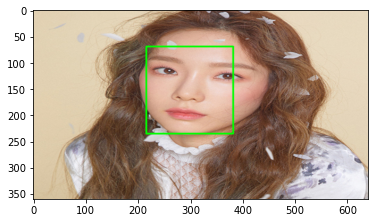

In [5]:
plt.imshow(img_rgb)
plt.show()

In [6]:
print(dlib_rects)

rectangles[[(216, 69) (382, 235)]]


In [7]:
landmark_predictor = dlib.shape_predictor('./model/shape_predictor_68_face_landmarks.dat')

In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


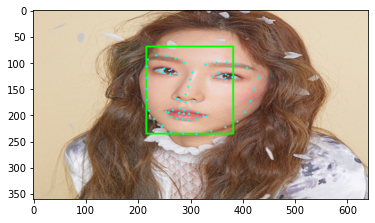

In [9]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_rgb, point, 2, (0, 255, 255), -1) # yellow

#img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(291, 160)
(x,y) : (291,77)
(w,h) : (167,167)


In [11]:
img_sticker = cv2.imread('./images/king.png')
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(167, 167, 3)


In [12]:
refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (208,-90)


In [13]:
img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)

(77, 167, 3)


In [14]:
refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (208,0)


In [15]:
sticker_area = img_rgb[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_rgb[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

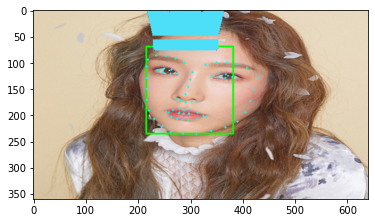

In [16]:
plt.imshow(img_rgb)
plt.show()

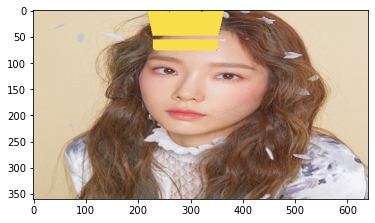

In [17]:
sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 고양이 수염!

In [80]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   # detector 선언


img = cv2.imread('./images/taeyeon-airport.png') # 이미지 로드
img = cv2.resize(img, (640, 1024)) # 640x1024의 크기로 Resize
img_show = img.copy() # 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 컬러 채널 순서 변경 (BGR -> RGB)
dlib_rects = detector_hog(img_rgb, 3)   # (image, num of img pyramid)

# bounding box!
# just one person
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_rgb, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    print('good')

good


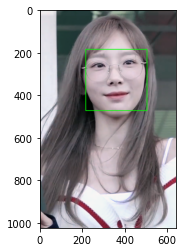

In [81]:
plt.imshow(img_rgb)
plt.show()

In [82]:
# finding landmarks!

landmark_predictor = dlib.shape_predictor('./model/shape_predictor_68_face_landmarks.dat')

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


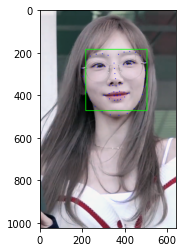

In [83]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_rgb, point, 2, (0,0, 255), -1) # bluedot 자세히 보면 보입니다

plt.imshow(img_rgb)
plt.show()

In [84]:
# mustache x좌표는 코의 중심으로
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[33][0] # 코 가장 밑
    y1 = landmark[33][1] # 코의 가장 밑
    y2 =  landmark[51][1] # 윗 입술의 가운데
    y = (y1+y2)//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(x,y) : (358,371)
(w,h) : (289,289)


In [85]:
img_sticker = cv2.imread('./images/cat-whiskers.png')
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(289, 289, 3)


In [86]:
refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (214,82)


In [87]:
sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
#     np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

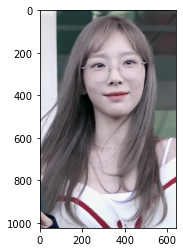

In [88]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()